# Import Library

In [81]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Import and Cleaning Data

In [82]:
df = pd.read_csv("Dataset/rumah123_yogya_unfiltered.csv")
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [83]:
df.shape

(2020, 9)

In [84]:
df.dtypes

price                object
nav-link             object
description          object
listing-location     object
bed                 float64
bath                float64
carport             float64
surface_area         object
building_area        object
dtype: object

## Drop unused column to make preprocessing easier

In [85]:
df.drop(columns=['nav-link', 'description'], inplace=True)
df.head()

,price,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar","Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


## Check and Handling Missing Value

In [86]:
df.isna().sum()

price                 0
listing-location      0
bed                  19
bath                 21
carport             307
surface_area          1
building_area         1
dtype: int64

In [87]:
df['carport'].unique()

array([ 2.,  1.,  3.,  4., nan,  5., 10.,  8.,  6.,  7., 15., 11., 12.])

In [88]:
df[df['carport'].isna()]

,price,listing-location,bed,bath,carport,surface_area,building_area
25,"Rp 5,5 Miliar","Depok, Sleman",3.0,2.0,NaN,275 m²,275 m²
31,"Rp 3,1 Miliar","Kasihan, Bantul",5.0,3.0,NaN,146 m²,290 m²
34,"Rp 2,5 Miliar","Bantul, Bantul",6.0,4.0,NaN,128 m²,130 m²
36,Rp 10 Miliar,"Sleman, Sleman",5.0,3.0,NaN,848 m²,427 m²
44,Rp 500 Juta,"Condong Catur, Sleman",3.0,1.0,NaN,72 m²,90 m²
...,...,...,...,...,...,...,...
1953,"Rp 3,7 Miliar","Bantul, Bantul",4.0,4.0,NaN,305 m²,270 m²
1968,Rp 5 Miliar,"Karangmojo, Gunung Kidul",4.0,2.0,NaN,4 m²,300 m²
1985,Rp 743 Juta,"Kasihan, Bantul",2.0,NaN,NaN,81 m²,75 m²
2012,"Rp 2,5 Miliar","Depok, Sleman",4.0,3.0,NaN,123 m²,200 m²


In [89]:
df = df.dropna(subset=['bed', 'bath', 'surface_area', 'building_area'])
df.isna().sum(), df.shape

(price                 0
 listing-location      0
 bed                   0
 bath                  0
 carport             285
 surface_area          0
 building_area         0
 dtype: int64,
 (1998, 7))

The carport isn't deleted because 0 carport means there is no carport in the house, while it's impossible a house with no bedroom and bathroom. The next step is fill nan value with 0

In [90]:
df['carport'] = df['carport'].fillna(0)
df.isna().sum(), df.shape

(price               0
 listing-location    0
 bed                 0
 bath                0
 carport             0
 surface_area        0
 building_area       0
 dtype: int64,
 (1998, 7))

## Listing-location Preprocessing

In [91]:
df['listing-location'].unique()

array(['Ngaglik, Sleman', 'Jombor, Sleman', 'Berbah, Sleman',
       'Prambanan, Sleman', 'Moyudan, Sleman', 'Depok, Sleman',
       'Gamping, Sleman', 'Kaliurang, Yogyakarta', 'Sedayu, Bantul',
       'Ngemplak, Sleman', 'Piyungan, Bantul', 'Umbulharjo, Yogyakarta',
       'Godean, Sleman', 'Mlati, Sleman', 'Condong Catur, Sleman',
       'Kasihan, Bantul', 'Bantul, Bantul', 'Sleman, Sleman',
       'Sewon, Bantul', 'Kalasan, Sleman', 'Plered, Bantul',
       'Sleman, Yogyakarta', 'Maguwoharjo, Yogyakarta',
       'Demangan, Yogyakarta', 'Purwomartani   , Sleman',
       'Minggir, Sleman', 'Gondokusuman, Yogyakarta',
       'Kotagede, Yogyakarta', 'Turi, Sleman', 'Kaliurang, Sleman',
       'Pogung, Yogyakarta', 'Mantrijeron, Yogyakarta',
       'Cebongan, Sleman', 'Pakualaman, Yogyakarta', 'Bantul, Yogyakarta',
       'Sayegan, Sleman', 'Danurejan, Yogyakarta',
       'Wirobrajan, Yogyakarta', 'Banguntapan, Bantul',
       'Seturan, Yogyakarta', 'Pakem, Sleman', 'Caturtunggal, Sleman

Some data had weird space, so it needs to be deleted

In [92]:
df['listing-location'] = [re.sub(r'\s+', '', i).strip() for i in df['listing-location']]
df['listing-location'].unique()

array(['Ngaglik,Sleman', 'Jombor,Sleman', 'Berbah,Sleman',
       'Prambanan,Sleman', 'Moyudan,Sleman', 'Depok,Sleman',
       'Gamping,Sleman', 'Kaliurang,Yogyakarta', 'Sedayu,Bantul',
       'Ngemplak,Sleman', 'Piyungan,Bantul', 'Umbulharjo,Yogyakarta',
       'Godean,Sleman', 'Mlati,Sleman', 'CondongCatur,Sleman',
       'Kasihan,Bantul', 'Bantul,Bantul', 'Sleman,Sleman', 'Sewon,Bantul',
       'Kalasan,Sleman', 'Plered,Bantul', 'Sleman,Yogyakarta',
       'Maguwoharjo,Yogyakarta', 'Demangan,Yogyakarta',
       'Purwomartani,Sleman', 'Minggir,Sleman', 'Gondokusuman,Yogyakarta',
       'Kotagede,Yogyakarta', 'Turi,Sleman', 'Kaliurang,Sleman',
       'Pogung,Yogyakarta', 'Mantrijeron,Yogyakarta', 'Cebongan,Sleman',
       'Pakualaman,Yogyakarta', 'Bantul,Yogyakarta', 'Sayegan,Sleman',
       'Danurejan,Yogyakarta', 'Wirobrajan,Yogyakarta',
       'Banguntapan,Bantul', 'Seturan,Yogyakarta', 'Pakem,Sleman',
       'Caturtunggal,Sleman', 'Tegalrejo,Yogyakarta',
       'Wonosari,GunungKid

## Check duplicate

In [93]:
df.duplicated().sum()

np.int64(437)

In [94]:
df[df.duplicated()].sort_values(by=['price', 'listing-location'])

,price,listing-location,bed,bath,carport,surface_area,building_area
1201,"Rp 1,1 Miliar","Ngaglik,Sleman",2.0,2.0,1.0,112 m²,85 m²
1382,"Rp 1,17 Miliar","Ngaglik,Sleman",3.0,2.0,1.0,115 m²,90 m²
1326,"Rp 1,27 Miliar","Banguntapan,Bantul",3.0,2.0,1.0,91 m²,100 m²
548,"Rp 1,29 Miliar","Banguntapan,Bantul",4.0,3.0,1.0,99 m²,105 m²
555,"Rp 1,29 Miliar","Banguntapan,Bantul",4.0,3.0,1.0,99 m²,105 m²
...,...,...,...,...,...,...,...
824,Rp 961 Juta,"Ngaglik,Sleman",3.0,3.0,2.0,107 m²,80 m²
1592,Rp 961 Juta,"Ngaglik,Sleman",3.0,3.0,2.0,107 m²,80 m²
1394,Rp 999 Juta,"Depok,Sleman",3.0,3.0,1.0,103 m²,100 m²
1322,Rp 999 Juta,"Maguwoharjo,Yogyakarta",3.0,3.0,1.0,103 m²,100 m²


So many duplicate data...

In [95]:
df.drop_duplicates(inplace=True)

In [96]:
df.shape

(1561, 7)

## Preprocessing Price

In [97]:
def convert_price(price_str: str) -> int:
    '''
    Function to preprocess Price and convert to numeric
    Parameters:
        price_str (str): Price as string
    Returns:
        float: Price as integer
    '''
    price_str = price_str.replace("Rp ", "")

    if "Miliar" in price_str:
        number = float(re.sub("[^0-9,]", "", price_str).replace(",",".")) * 1_000_000_000
    elif "Juta" in price_str:
        number = float(re.sub("[^0-9,]", "", price_str).replace(",",".")) * 1_000_000
    else:
        number = float(re.sub("[^0-9,]", "", price_str).replace(",","."))

    return int(number)

In [98]:
df['price'] = df['price'].apply(convert_price)
df.head()

,price,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,"Ngaglik,Sleman",3.0,3.0,2.0,120 m²,110 m²
1,170000000,"Jombor,Sleman",3.0,2.0,1.0,102 m²,126 m²
2,695000000,"Berbah,Sleman",2.0,2.0,1.0,100 m²,100 m²
3,560000000,"Prambanan,Sleman",3.0,1.0,1.0,109 m²,67 m²
4,200000000,"Moyudan,Sleman",2.0,1.0,1.0,60 m²,30 m²


In [99]:
df.dtypes

price                 int64
listing-location     object
bed                 float64
bath                float64
carport             float64
surface_area         object
building_area        object
dtype: object

## Preprocessing bed, bath, and carport

In [100]:
def convert_to_int(data_str: str) -> int:
    '''
    Function to convert data str to int
    Parameter:
        data_str (str): string to be converted to int
    Returns:
        data_int: integer value of the input string
    '''
    data_int = data_str.astype(int)
    return data_int

In [101]:
df[['bed', 'bath', 'carport']] = df[['bed', 'bath', 'carport']].apply(convert_to_int)
df.head()

,price,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,"Ngaglik,Sleman",3,3,2,120 m²,110 m²
1,170000000,"Jombor,Sleman",3,2,1,102 m²,126 m²
2,695000000,"Berbah,Sleman",2,2,1,100 m²,100 m²
3,560000000,"Prambanan,Sleman",3,1,1,109 m²,67 m²
4,200000000,"Moyudan,Sleman",2,1,1,60 m²,30 m²


## Preprocess surface_area and building_area

In [102]:
def convert_area(area_str: str) -> int:
    '''
    Function to preprocess area and convert to int
    Parameters:
        area_str (str): area string to be converted
    Returns:
        int: converted area value
    '''
    return int(area_str.replace("m²", "").strip())

In [103]:
df['surface_area'] = df['surface_area'].apply(convert_area)
df['building_area'] = df['building_area'].apply(convert_area)
df.head()

,price,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,"Ngaglik,Sleman",3,3,2,120,110
1,170000000,"Jombor,Sleman",3,2,1,102,126
2,695000000,"Berbah,Sleman",2,2,1,100,100
3,560000000,"Prambanan,Sleman",3,1,1,109,67
4,200000000,"Moyudan,Sleman",2,1,1,60,30


## listing-location preprocessing

There are 2 ways that can be done with listing-location:

1. perform OHE/dummies to linear model
2. perform target encoding for tree model

### Perform dummies for linear model

In [104]:
df_dummies = pd.get_dummies(df, columns=['listing-location'], drop_first=True)
df_dummies.head()

,price,bed,bath,carport,surface_area,building_area,"listing-location_Banguntapan,Bantul","listing-location_Bantul,Bantul","listing-location_Bantul,Yogyakarta","listing-location_Berbah,Sleman",...,"listing-location_Sidoarum,Sleman","listing-location_Sleman,Sleman","listing-location_Sleman,Yogyakarta","listing-location_Tegalrejo,Yogyakarta","listing-location_Tempel,Sleman","listing-location_Turi,Sleman","listing-location_Umbulharjo,Yogyakarta","listing-location_Wates,KulonProgo","listing-location_Wirobrajan,Yogyakarta","listing-location_Wonosari,GunungKidul"
0,1790000000,3,3,2,120,110,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,170000000,3,2,1,102,126,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,695000000,2,2,1,100,100,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,560000000,3,1,1,109,67,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,200000000,2,1,1,60,30,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Perform target encoding for tree model

In [105]:
import category_encoders as ce

In [106]:
encoders = ce.TargetEncoder(cols=['listing-location'])
df_target = df.copy()
df_target['listing-location'] = encoders.fit_transform(df_target['listing-location'], df_target['price'])
df_target.head()

,price,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,2.242062e+09,3,3,2,120,110
1,170000000,1.748368e+09,3,2,1,102,126
2,695000000,1.297604e+09,2,2,1,100,100
3,560000000,1.410854e+09,3,1,1,109,67
4,200000000,1.669774e+09,2,1,1,60,30


# EDA

In [107]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['price', 'bed', 'bath', 'carport', 'surface_area', 'building_area']

In [108]:
df.shape

(1561, 7)

In [109]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
price,1561.0,1.920009e+09,2.725793e+09,7000000.0,675000000.0,1.200000e+09,2.200000e+09,4.210000e+10
bed,1561.0,4.183216e+00,4.004293e+00,1.0,3.0,3.000000e+00,4.000000e+00,4.900000e+01
bath,1561.0,3.158873e+00,3.881134e+00,1.0,1.0,2.000000e+00,3.000000e+00,4.900000e+01
carport,1561.0,1.365151e+00,1.384869e+00,0.0,1.0,1.000000e+00,2.000000e+00,1.500000e+01
surface_area,1561.0,1.965003e+02,2.761058e+02,4.0,99.0,1.230000e+02,1.830000e+02,4.222000e+03
building_area,1561.0,1.542855e+06,6.095117e+07,4.0,65.0,1.070000e+02,1.800000e+02,2.408150e+09


## Heatmap

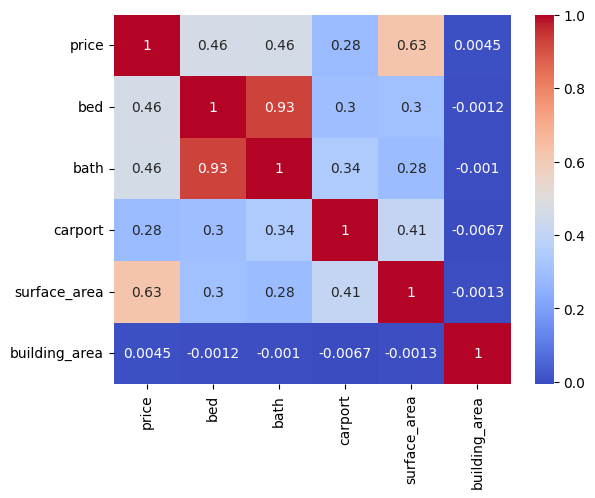

In [110]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

From the heatmap above, the conclusion is:
1. Use `surface_area` because it has high correlation
2. Consider `bed`/`bath`, I can use one of them to avoid multicolinearity, but I would use both
3. `carport` has low correlation with price, but I still use it
4. Delete `building_area`, because the correlation is very close with 0

selected_columns = ['surface_area', 'bed', 'bath', 'carport', 'listing location']

In [111]:
numeric_cols.remove('building_area')
df_dummies.drop('building_area', axis=1, inplace=True)
df_target.drop('building_area', axis=1, inplace=True)

## Boxplot

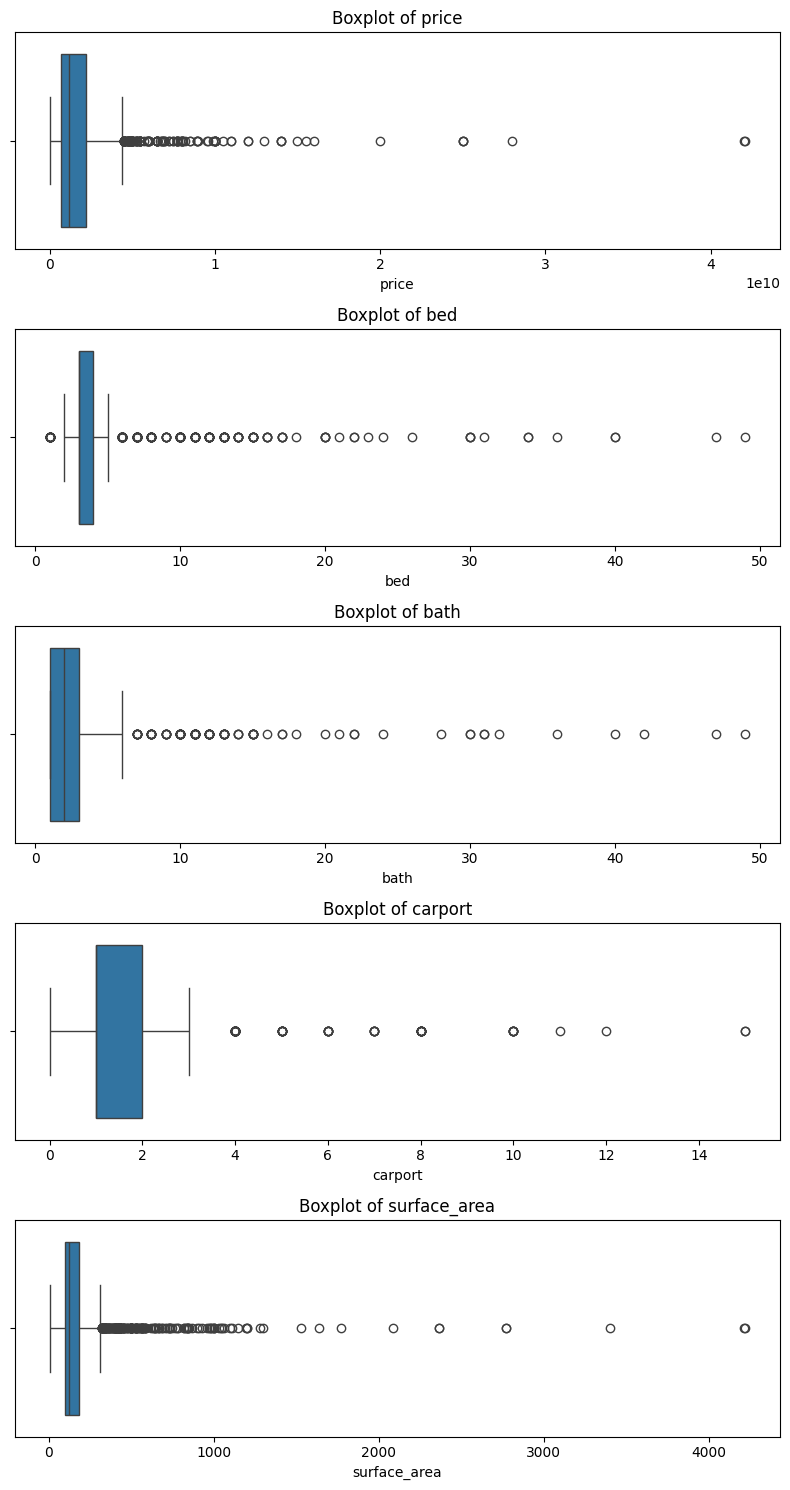

In [112]:
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8, len(numeric_cols)*3))

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

It seems so many outlier, so normalization is required

## Average price by location

In [113]:
avg_price = df.groupby('listing-location')['price'].mean()
avg_price = avg_price.sort_values(ascending=False)
print("Top 5 most Expensive and most cheap location")
avg_price

Top 5 most Expensive and most cheap location


listing-location
Pakualaman,Yogyakarta    2.100000e+10
Demangan,Yogyakarta      8.313000e+09
Sekip,Yogyakarta         6.700000e+09
Caturtunggal,Sleman      5.340000e+09
Seturan,Yogyakarta       5.094167e+09
                             ...     
Wonosari,GunungKidul     3.044000e+08
Kulonprogo,KulonProgo    3.007000e+08
Moyudan,Sleman           3.000000e+08
Sentolo,KulonProgo       2.803636e+08
Bambanglipuro,Bantul     1.620000e+08
Name: price, Length: 69, dtype: float64

In [114]:
top_expensive = avg_price.head(5)
top_cheap = avg_price.tail(5)

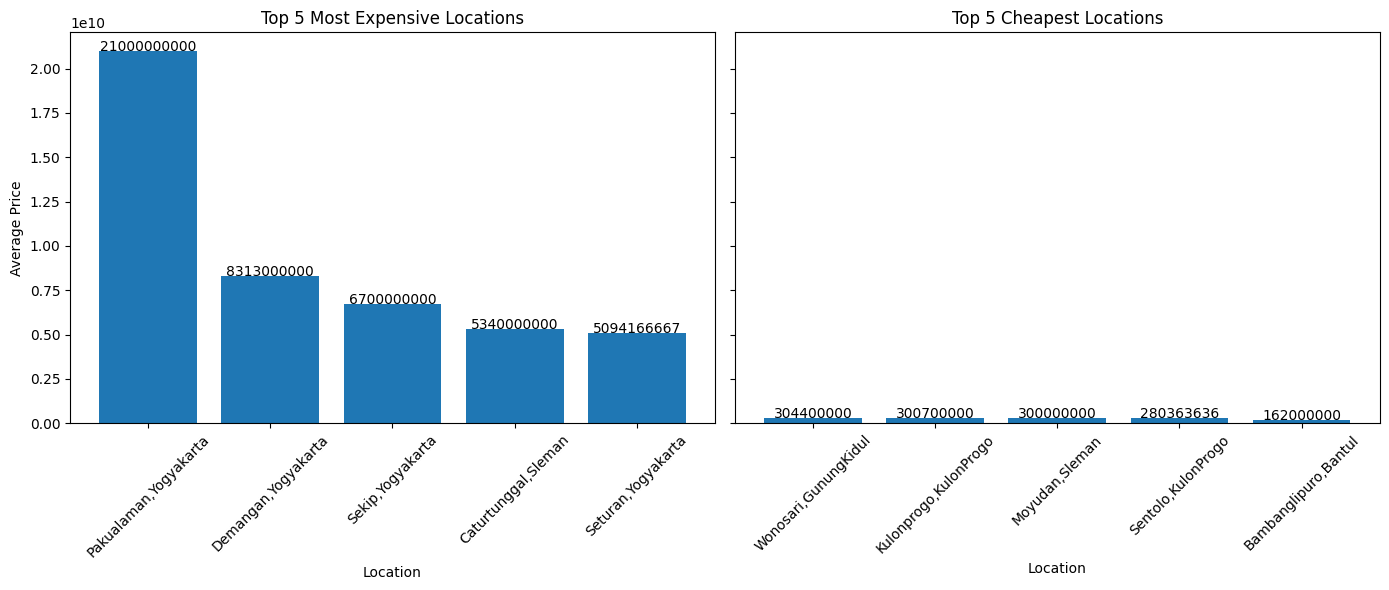

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(top_expensive.index, top_expensive.values)
axes[0].set_title('Top 5 Most Expensive Locations')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Average Price')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(top_expensive.values):
    axes[0].text(i, v + 50000, f"{v:.0f}", ha='center')

axes[1].bar(top_cheap.index, top_cheap.values)
axes[1].set_title('Top 5 Cheapest Locations')
axes[1].set_xlabel('Location')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(top_cheap.values):
    axes[1].text(i, v + 50000, f"{v:.0f}", ha='center')

plt.tight_layout()
plt.show()

We can see the average house price in Yogyakarta City and Sleman are extremely expensive.

## Check distribution

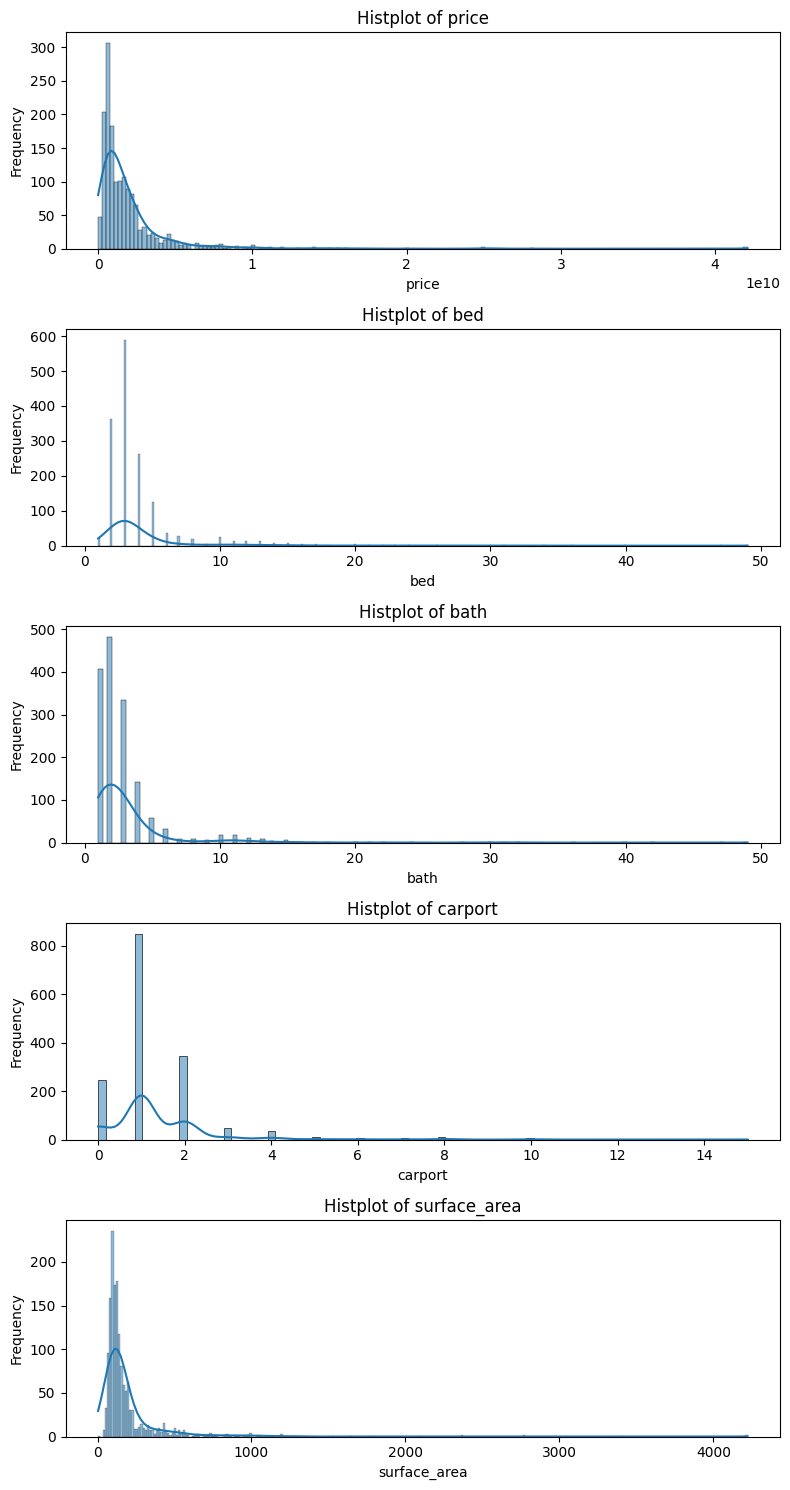

In [116]:
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8, len(numeric_cols)*3))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


All of features is positive skew/right skew

# Normalisasi

In [117]:
df_dummies.dtypes

price                                     int64
bed                                       int64
bath                                      int64
carport                                   int64
surface_area                              int64
                                          ...  
listing-location_Turi,Sleman               bool
listing-location_Umbulharjo,Yogyakarta     bool
listing-location_Wates,KulonProgo          bool
listing-location_Wirobrajan,Yogyakarta     bool
listing-location_Wonosari,GunungKidul      bool
Length: 73, dtype: object

we don't need boolean data to be normalized

In [118]:
non_bool_cols = df_dummies.select_dtypes(exclude='boolean').columns.tolist()

In [119]:
scaler = StandardScaler()

data_dummies = df_dummies.copy()
scaled_non_bool = scaler.fit_transform(data_dummies[non_bool_cols])

scaled_non_bool_df = pd.DataFrame(scaled_non_bool, columns=non_bool_cols, index=df_dummies.index)
df_dummies_normalized = pd.concat([scaled_non_bool_df, data_dummies.drop(columns=non_bool_cols)], axis=1)


In [120]:
df_dummies_normalized.head()

,price,bed,bath,carport,surface_area,"listing-location_Banguntapan,Bantul","listing-location_Bantul,Bantul","listing-location_Bantul,Yogyakarta","listing-location_Berbah,Sleman","listing-location_Caturtunggal,Sleman",...,"listing-location_Sidoarum,Sleman","listing-location_Sleman,Sleman","listing-location_Sleman,Yogyakarta","listing-location_Tegalrejo,Yogyakarta","listing-location_Tempel,Sleman","listing-location_Turi,Sleman","listing-location_Umbulharjo,Yogyakarta","listing-location_Wates,KulonProgo","listing-location_Wirobrajan,Yogyakarta","listing-location_Wonosari,GunungKidul"
0,-0.047711,-0.295582,-0.040948,0.458565,-0.277158,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.642224,-0.295582,-0.298687,-0.263756,-0.342371,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.449558,-0.545394,-0.298687,-0.263756,-0.349617,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.499101,-0.295582,-0.556426,-0.263756,-0.317010,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.631214,-0.545394,-0.556426,-0.263756,-0.494535,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


now perform normalize for df_target

In [121]:
df_target.dtypes

price                 int64
listing-location    float64
bed                   int64
bath                  int64
carport               int64
surface_area          int64
dtype: object

In [122]:
scaler = StandardScaler()
data_target = df_target.copy()
scaled = scaler.fit_transform(data_target)

df_target_normalized = pd.DataFrame(scaled, columns=df_target.columns, index=df_target.index)

In [123]:
df_target_normalized.head()

,price,listing-location,bed,bath,carport,surface_area
0,-0.047711,0.639557,-0.295582,-0.040948,0.458565,-0.277158
1,-0.642224,-0.234190,-0.295582,-0.298687,-0.263756,-0.342371
2,-0.449558,-1.031957,-0.545394,-0.298687,-0.263756,-0.349617
3,-0.499101,-0.831526,-0.295582,-0.556426,-0.263756,-0.317010
4,-0.631214,-0.373287,-0.545394,-0.556426,-0.263756,-0.494535


In [42]:
df_target_normalized.shape

(1561, 6)

# Modeling

In modeling, I will try Linear model and Tree model

## 1. Linear model

### Linear Regression

In [82]:
df_dummies_normalized.head()

,price,bed,bath,carport,surface_area,"listing-location_Banguntapan,Bantul","listing-location_Bantul,Bantul","listing-location_Bantul,Yogyakarta","listing-location_Berbah,Sleman","listing-location_Caturtunggal,Sleman",...,"listing-location_Sidoarum,Sleman","listing-location_Sleman,Sleman","listing-location_Sleman,Yogyakarta","listing-location_Tegalrejo,Yogyakarta","listing-location_Tempel,Sleman","listing-location_Turi,Sleman","listing-location_Umbulharjo,Yogyakarta","listing-location_Wates,KulonProgo","listing-location_Wirobrajan,Yogyakarta","listing-location_Wonosari,GunungKidul"
0,-0.047711,-0.295582,-0.040948,0.458565,-0.277158,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.642224,-0.295582,-0.298687,-0.263756,-0.342371,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.449558,-0.545394,-0.298687,-0.263756,-0.349617,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.499101,-0.295582,-0.556426,-0.263756,-0.317010,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.631214,-0.545394,-0.556426,-0.263756,-0.494535,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
X = df_dummies_normalized.drop('price', axis=1)
y = df_dummies_normalized['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1248, 72), (313, 72), (1248,), (313,))

In [84]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)


LinearRegression()

In [85]:
y_train_pred = lin_reg_model.predict(X_train)
mse = mean_squared_error(y_train_pred, y_train_pred)
print(f"train mean squared error: {mse}")

train mean squared error: 0.0


In [46]:
y_pred = lin_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"test mean squared error: {mse}")

test mean squared error: 0.1834501641718185


### ElasticNet

In [47]:
enet_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
enet_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [48]:
y_train_pred = enet_model.predict(X_train)
mse = mean_squared_error(y_train_pred, y_train_pred)
print(f"train mean squared error: {mse}")

train mean squared error: 0.0


In [49]:
y_pred = enet_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"mean squared error: {mse}")

mean squared error: 0.2663851445340297


### Evaluation

Linear Regression has a smaller error compared with ElasticNet.
- Linear Regression is better for simpler data, without multicollinearity or a large number of features, and if you need a model that is fast and easy to interpret.

- ElasticNet is better for more complex data, with many correlated features, or if you are concerned about overfitting or noise in the data. ElasticNet provides greater control over regularization and feature selection.

In the applied model, the expectation is that ElasticNet will have higher accuracy, so I will perform hyperparameter tuning on ElasticNet, due there's no parameter in Linear Regression.

In [55]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-5, 1e-6],
    'selection': ['cyclic', 'random'],
    'warm_start': [True, False]  
}

grid_search = GridSearchCV(estimator=enet_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
                         'max_iter': [1000, 5000, 10000],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 1e-05, 1e-06],
                         'warm_start': [True, False]},
             scoring='neg_mean_squared_error')

In [56]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'alpha': 0.1, 'fit_intercept': False, 'l1_ratio': 0.5, 'max_iter': 1000, 'selection': 'random', 'tol': 0.0001, 'warm_start': True}
Best score found:  -0.6456332224378045


In [57]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

Test MSE: 0.123828587510955


The MSE is better than Linear Regression

## 2. Tree model

### Decision Tree

In [124]:
X = df_target_normalized.drop('price', axis=1)
y = df_target_normalized['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1248, 5), (313, 5), (1248,), (313,))

In [87]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [89]:
y_train_pred = dt_model.predict(X_train)
mse = mean_squared_error(y_train_pred, y_train_pred)
print(f"train mean squared error: {mse}")

train mean squared error: 0.0


In [90]:
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"test mean squared error: {mse}")

test mean squared error: 0.27728575014129847


### Random Forest

In [125]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [126]:
y_train_pred = rf_model.predict(X_train)
mse = mean_squared_error(y_train_pred, y_train_pred)
print(f"train mean squared error: {mse}")

train mean squared error: 0.0


In [127]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"test mean squared error: {mse}")

test mean squared error: 0.10164993726005747


### Evaluation

Random Forest model has the lowest error. Hyperparameter tuning will be performed to see is this would be better?

In [128]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'n_jobs': [-1],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

a:\DBS DIcoding Expert - proyek pertama\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4320 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1649 fits failed with the following error:
Traceback (most recent call last):
  File "a:\DBS DIcoding Expert - proyek pertama\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "a:\DBS DIcoding Expert - proyek pertama\.venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "a:\DBS DIcoding Expert - proyek pertama\.venv\lib\site-packages\sklearn\base.py", line 666, in _validate_para

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300], 'n_jobs': [-1],
                         'oob_score': [True, False], 'random_state': [42]},
             scoring='neg_mean_squared_error')

In [129]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'oob_score': False, 'random_state': 42}
Best score found:  -0.4036199465262559


In [130]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [131]:
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

Test MSE: 0.10098347270551815
